# Imports


In [8]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
from scripts.gaussian.streaming_clusterer import CluStream
from scripts.gaussian.dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [10]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [11]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [12]:
def init_dynamic_clusterer(data=reference_data, threshold=2.5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 59676
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 6 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.660462186254304), np.float64(6.252645297982227), np.float64(2.0744543603096885), np.float64(1.1753829899190487), np.float64(2.76014524355702), np.float64(2.521619107531405), np.float64(5.056742391367068), np.float64(2.5433404336030456), np.float64(6.170334372027167), np.float64(5.474163091045686), np.float64(3.8958721243101975), np.float64(6.4844583779916), np.float64(2.977518139214351), np.float64(4.356919335222792), np.float64(5.385484988662018), np.float64(5.834973291419018), np.float64(4.9105969818159085), np.float64(5.092834661746847), np.float64(5.902385100551035), np.float64(6.25477733009163), np.float64(6.214252439038507), np.float64(3.2200042023055855), np.float64(3.5128310726976943), np.float64(5.64808325383855), np.float64(5.424578017201917), np.float64(5.634179430446405), np.float64(5.555230581897429), np.float6

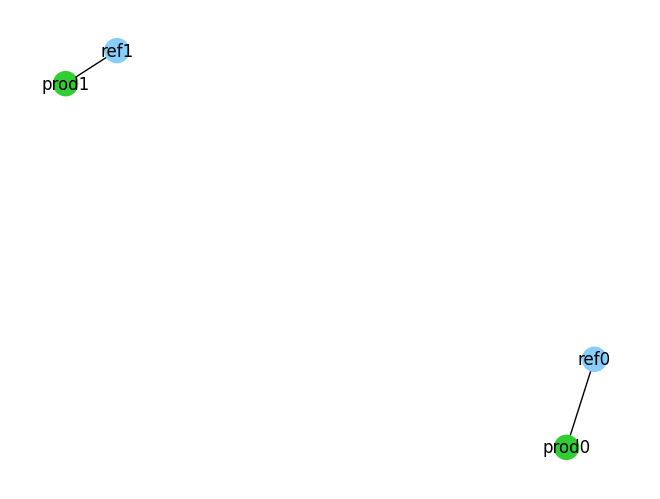

(id: 0) SURVIVED as (id: 0) (score: 0.9814655633452939)
(id: 1) SURVIVED as (id: 1) (score: 0.9933576646920952)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 36 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.638190649021631), np.float64(6.223271156179494), np.float64(2.059466853223998), np.float64(1.1724152636939082), np.float64(2.744301564392002), np.float64(2.5145260314831788), np.float64(5.0679339896673445), np.float64(2.547494678661741), np.float64(6.168872194728632), np.float64(5.472342208884228), np.float64(3.896902156972337), np.float64(6.489626870758232), np.float64(2.982974484049041), np.float64(4.357809299710153), np.float64(5.3875060410335145), np.float64(5.834639935657896), np.float64(4.917305587352007), np.float64(5.088849982996097), np.float64(5.905917354013728), np.float64(6.2505372968213315), np.float64(6.202379654193747), n

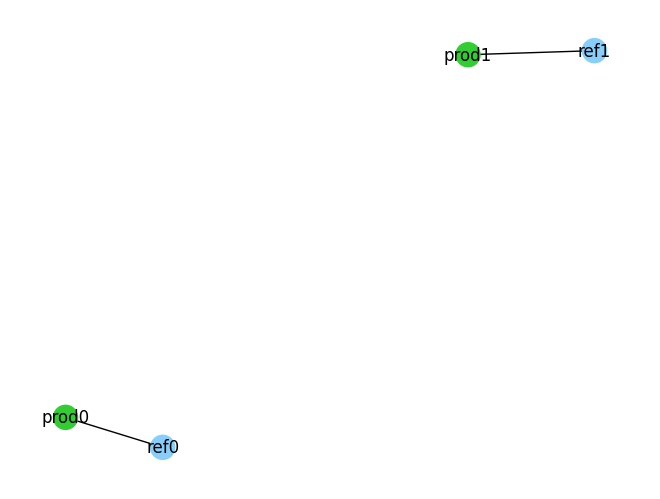

(id: 0) SURVIVED as (id: 0) (score: 0.9644635305542479)
(id: 1) SURVIVED as (id: 1) (score: 0.9382528286734718)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 122 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.581798554885955), np.float64(6.136641800403595), np.float64(2.047417936580522), np.float64(1.1759617616023337), np.float64(2.732804332460676), np.float64(2.5221976240475974), np.float64(5.079829391979036), np.float64(2.551458405596869), np.float64(6.165966587407248), np.float64(5.473123751935505), np.float64(3.891223444825127), np.float64(6.50116506360826), np.float64(2.9965407578718093), np.float64(4.360104770887466), np.float64(5.397864489328294), np.float64(5.820229589939117), np.float64(4.924975698902493), np.float64(5.089064010551998), np.float64(5.904558899856749), np.float64(6.239167630672455), np.float64(6.194468061129252), np.

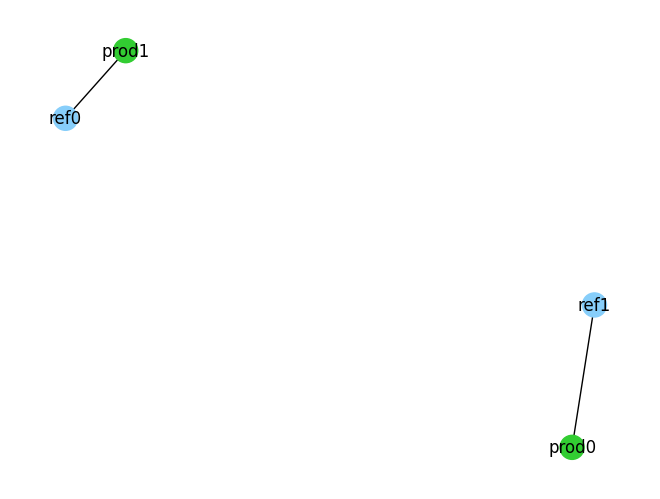

(id: 1) SURVIVED as (id: 1) (score: 0.9140320046659034)
(id: 0) SURVIVED as (id: 0) (score: 0.8871468865537511)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 152 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.422191219157483), np.float64(5.820093893143068), np.float64(1.9684336020285824), np.float64(1.1388796722314445), np.float64(2.686595584972795), np.float64(2.5255705319255233), np.float64(5.1340513057019335), np.float64(2.569527311497424), np.float64(6.137534902756473), np.float64(5.473624355821724), np.float64(3.882072773324438), np.float64(6.539837144943605), np.float64(3.055086517908487), np.float64(4.373571516519569), np.float64(5.44560833436897), np.float64(5.777567783033992), np.float64(4.945455140378102), np.float64(5.081926110279129), np.float64(5.9035282623336975), np.float64(6.18823276657656), np.float64(6.168218064020915), np

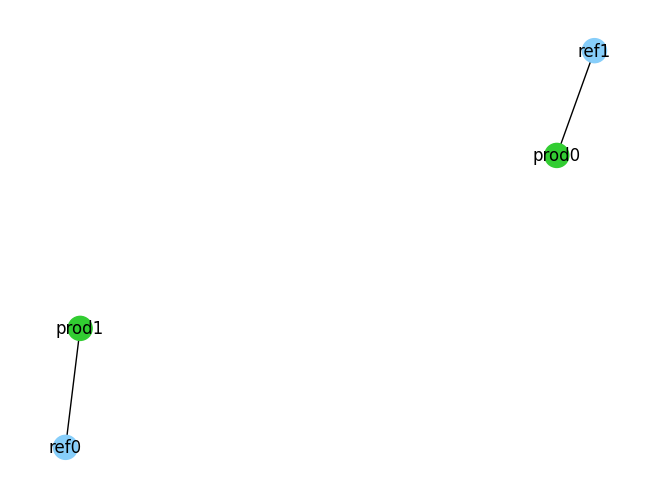

(id: 1) SURVIVED as (id: 1) (score: 0.9867164337999542)
(id: 0) SURVIVED as (id: 0) (score: 0.9603087088616389)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 208 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.375985699138422), np.float64(5.7645482194834745), np.float64(1.9146566781504402), np.float64(1.120664060800925), np.float64(2.6374015623125535), np.float64(2.496116095575793), np.float64(5.166474567062553), np.float64(2.5796118892472366), np.float64(6.1246971919618804), np.float64(5.470585368145471), np.float64(3.889812458520648), np.float64(6.550013139330107), np.float64(3.0696566762595343), np.float64(4.384733339835858), np.float64(5.458392932497222), np.float64(5.78007451693217), np.float64(4.958641076910085), np.float64(5.070438215102272), np.float64(5.912157075158481), np.float64(6.166873222109915), np.float64(6.142392476399739), 

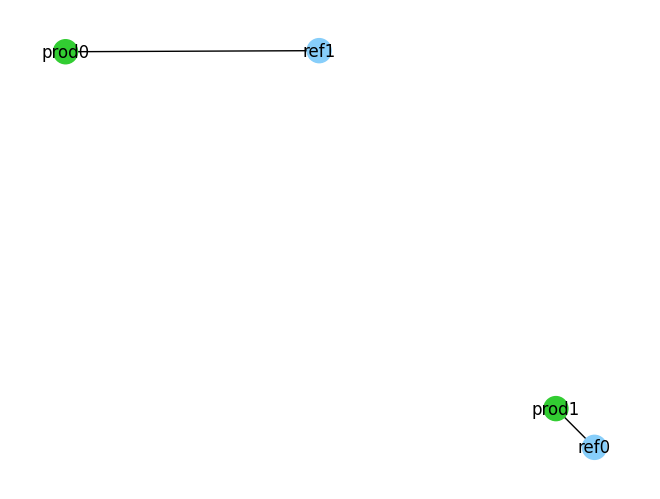

(id: 1) SURVIVED as (id: 1) (score: 0.9676716417142021)
(id: 0) SURVIVED as (id: 0) (score: 0.9651910753170915)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 286 ----> Apply macroclustering <!>

ref0 - center: [np.float64(4.325445059891585), np.float64(5.702658456760449), np.float64(1.8749300365919594), np.float64(1.105649200442073), np.float64(2.603235602378845), np.float64(2.479364574610532), np.float64(5.197465466929006), np.float64(2.586783061970721), np.float64(6.11024900845119), np.float64(5.468451623078231), np.float64(3.8857888101221443), np.float64(6.557541663830097), np.float64(3.079211162996816), np.float64(4.395445118893634), np.float64(5.467418390315967), np.float64(5.780722838181716), np.float64(4.969692848540924), np.float64(5.064061167475941), np.float64(5.917469642974518), np.float64(6.1452102189535625), np.float64(6.118635869288182), np.

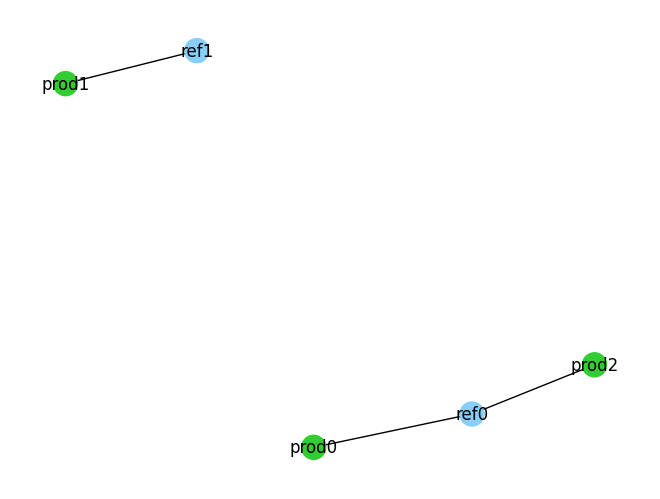

(id: 0) SURVIVED as (id: 0) (score: 0.5201786434136211)
(id: 1) SURVIVED as (id: 1) (score: 0.8860899222102974)
(!) (id: 0) SURVIVED as (id: 2) but a SPLITTING is needed (score: 0.7921877236820282)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 397 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.4743765656641754), np.float64(4.574073906253451), np.float64(1.3173266990166295), np.float64(0.8294933597140446), np.float64(2.1363417310866097), np.float64(2.306234342404985), np.float64(5.638689067182426), np.float64(2.700817038804789), np.float64(5.90693944148247), np.float64(5.432049642910405), np.float64(3.790395769182362), np.float64(6.711059184524673), np.float64(3.2568542090500783), np.float64(4.5159110112793), np.float64(5.598482587139766), np.float64(5.754250183960497), np.float64(5.15568457951572), np.float64(4.974938865140956), np.

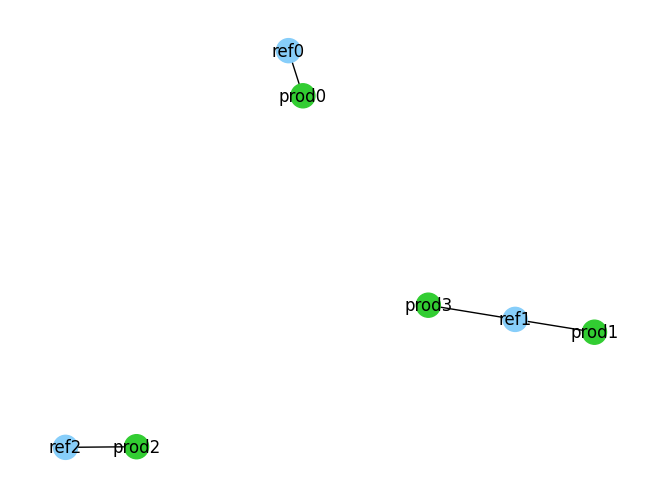

(id: 0) SURVIVED as (id: 0) (score: 0.9032820412676685)
(id: 1) SURVIVED as (id: 1) (score: 0.77890026985957)
(id: 2) SURVIVED as (id: 2) (score: 0.9238440480681621)
(!) (id: 1) SURVIVED as (id: 3) but a SPLITTING is needed (score: 0.5838838638511311)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 569 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.5461786562478292), np.float64(4.491766003649482), np.float64(1.3680649333270851), np.float64(0.8886938405470797), np.float64(2.2097966305163332), np.float64(2.3362576992797), np.float64(5.604579148622843), np.float64(2.690708556956494), np.float64(5.9346339899598535), np.float64(5.430944165623967), np.float64(3.81146263040501), np.float64(6.711304549101402), np.float64(3.2855100233617933), np.float64(4.490124990685714), np.float64(5.6086975742112894), np.float64(5.718182826552206), 

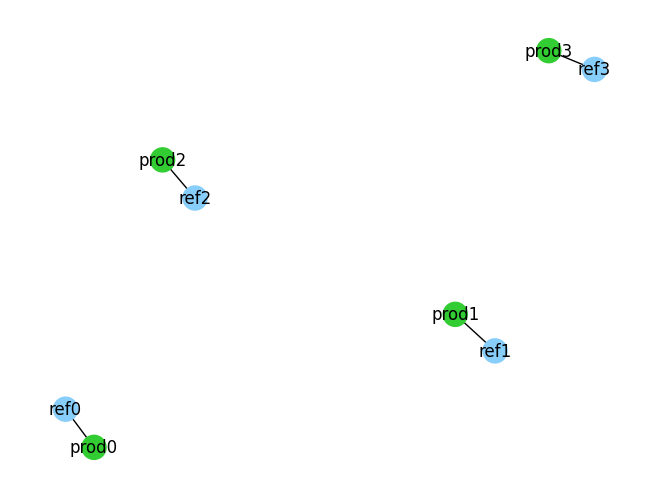

(id: 0) SURVIVED as (id: 0) (score: 0.8813117336284024)
(id: 1) SURVIVED as (id: 1) (score: 0.9718587471469734)
(id: 2) SURVIVED as (id: 2) (score: 0.9840477632325415)
(id: 3) SURVIVED as (id: 3) (score: 0.9256773712824795)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 718 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.442440481144095), np.float64(4.370039686383015), np.float64(1.3085912435113531), np.float64(0.8222745338837982), np.float64(2.181549796342704), np.float64(2.3387575351785967), np.float64(5.6475323038913166), np.float64(2.701046072550123), np.float64(5.895182357575215), np.float64(5.431346610647879), np.float64(3.7725773433067475), np.float64(6.728183133632037), np.float64(3.2999174857498854), np.float64(4.514334795688208), np.float64(5.628226659113293), np.float64(5.712703410367378), np.float64(5.1542268751065

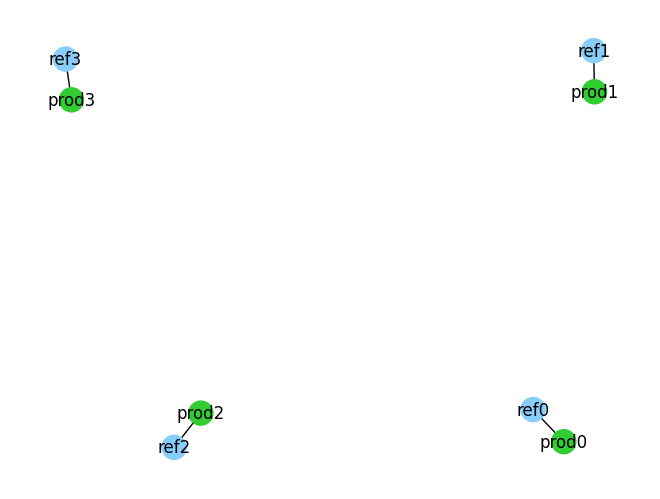

(id: 0) SURVIVED as (id: 0) (score: 0.9288171398533169)
(id: 1) SURVIVED as (id: 1) (score: 0.9933390596788464)
(id: 2) SURVIVED as (id: 2) (score: 0.9782338795088613)
(id: 3) SURVIVED as (id: 3) (score: 0.8693789222680244)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 773 ----> Apply macroclustering <!>

ref0 - center: [np.float64(3.365471868891803), np.float64(4.370732821591032), np.float64(1.2769436185276637), np.float64(0.7855594255071641), np.float64(2.132689450120169), np.float64(2.325984661861412), np.float64(5.67591036362946), np.float64(2.712081170317702), np.float64(5.8799694240341145), np.float64(5.430247293833511), np.float64(3.7534594276860624), np.float64(6.73592362139335), np.float64(3.2896074685267616), np.float64(4.52643889503479), np.float64(5.621873700003919), np.float64(5.728982425761016), np.float64(5.17046362886626), 

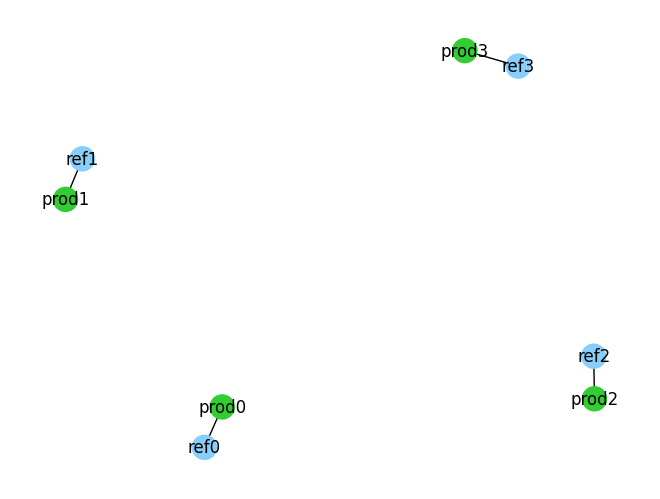

(id: 0) SURVIVED as (id: 0) (score: 0.958159443744611)
(id: 1) SURVIVED as (id: 1) (score: 0.9876395108722821)
(id: 2) SURVIVED as (id: 2) (score: 0.9884891764955942)
(id: 3) SURVIVED as (id: 3) (score: 0.9706249880943488)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(3.3826260423365206), np.float64(4.341653724405021), np.float64(1.3087015960647064), np.float64(0.8090040684218118), np.float64(2.163626093293916), np.float64(2.3489593027886513), np.float64(5.653368314558141), np.float64(2.708235519426147), np.float64(5.894722607753562), np.float64(5.430987799384027), np.float64(3.756848620713939), np.float64(6.73882707972904), np.float64(3.297407563341152), np.float64(4.51476651005888), np.float64(5.622948298414316), np.float64(5.712745614641855), np.float64(5.16543753665172), np.float64(4.977674580337565), np.float64(5.96884

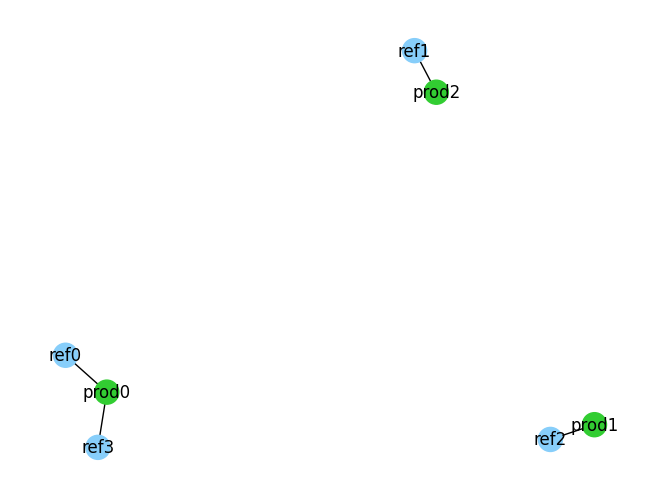

(!) [0, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.638884422389077), np.float64(0.7589136508381784)])
(id: 2) SURVIVED as (id: 2) (score: 1.0)
(id: 1) SURVIVED as (id: 1) (score: 0.9909798237707694)

Final macroclusters:
(id: 1)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------



In [13]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(
    print_graph=True, print_statistics=True, macroclustering_at_end=True
)

Creating the directory...
Drawing ...


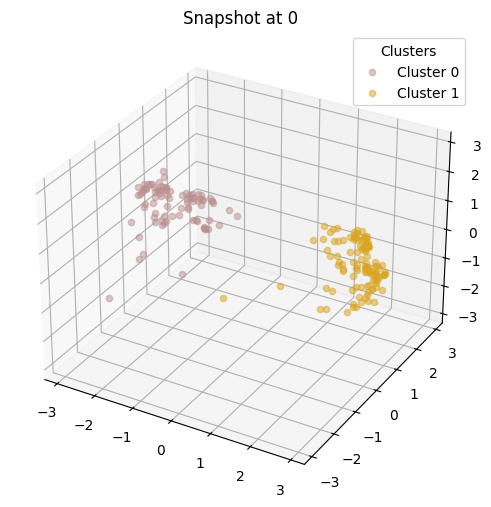

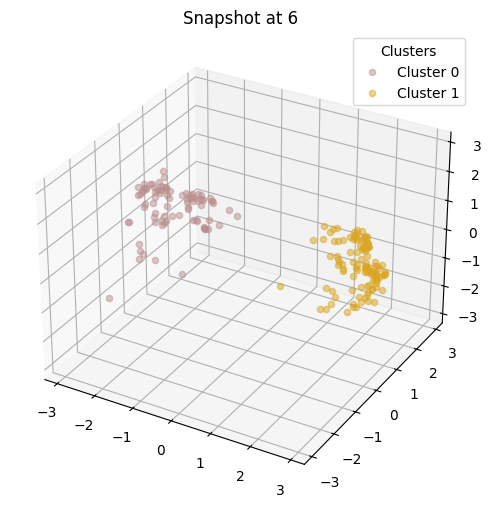

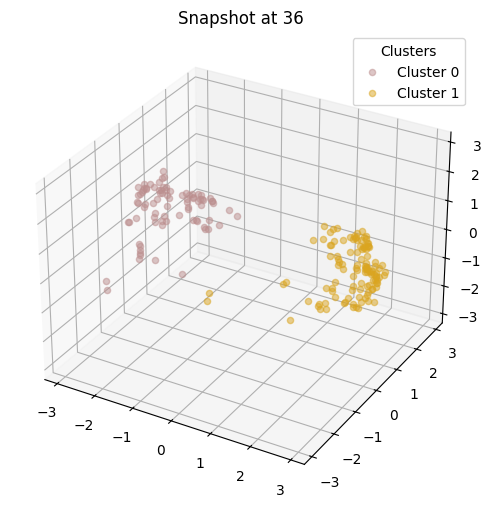

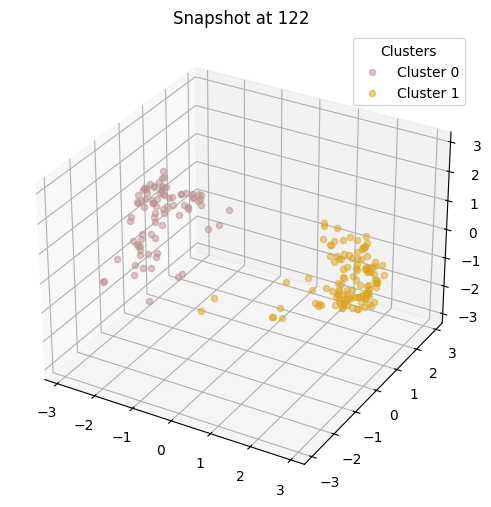

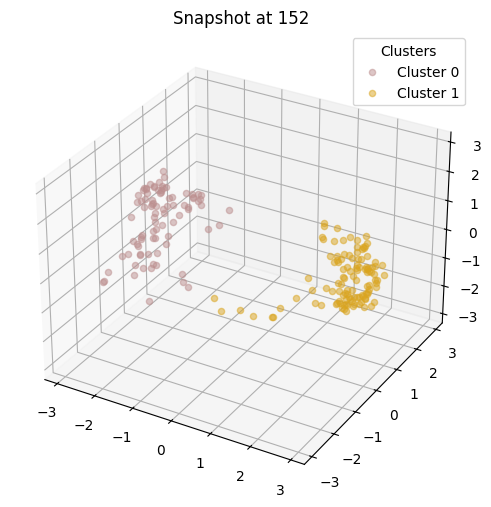

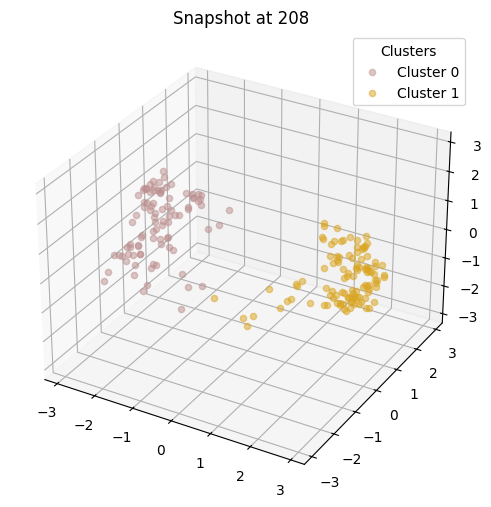

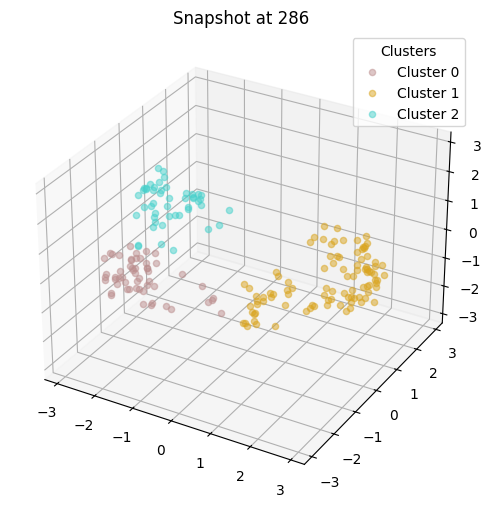

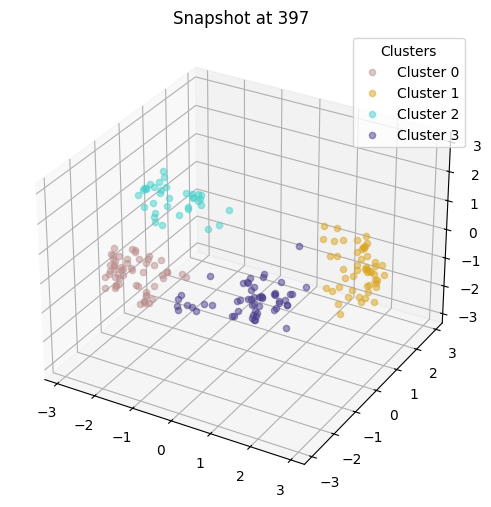

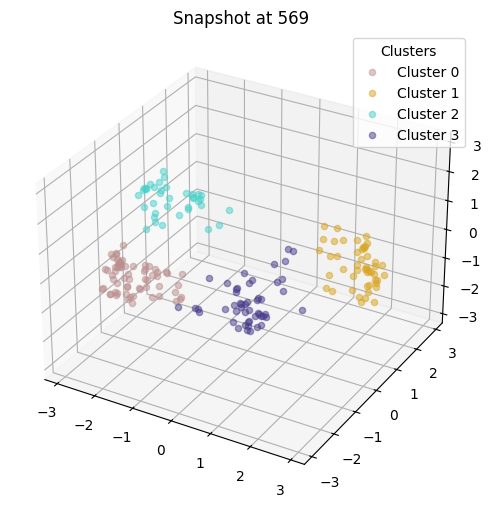

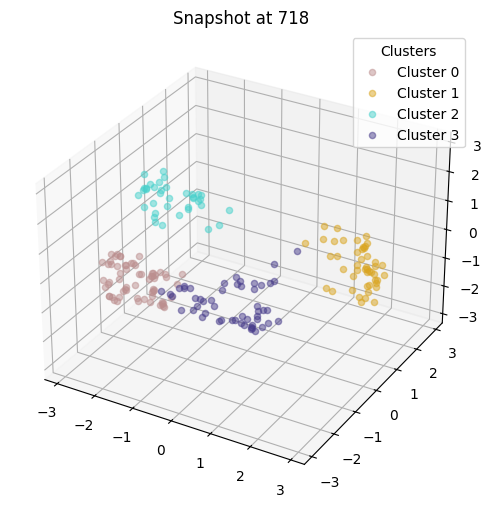

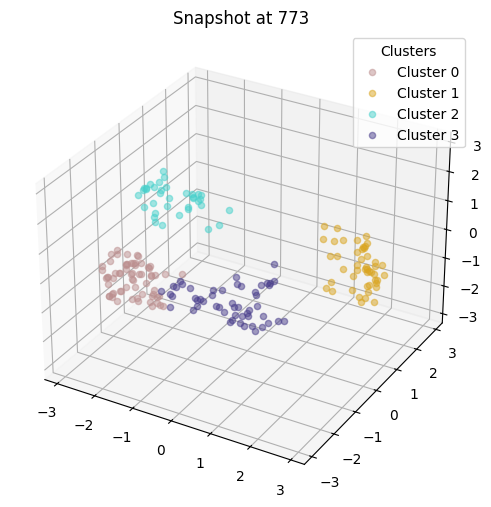

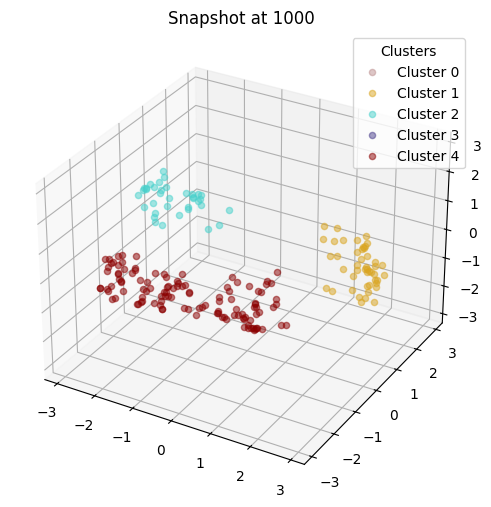

In [14]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=False)